# Energy Efficiency                                                                                                      
### Predicting y1 Heating Load in Python
### Predicting y2 Cooling Load in Python

### _By: Ankur Patel_
---


### Introduction 
Using the Energy Efficiency Data Set (http://archive.ics.uci.edu/ml/datasets/Energy+efficiency), a regression model will be built to predict the y1 Heating Load and y2 Cooling Load. Firsly, an EDA will be performed to overview the dataset, and the data will be preprocessed. After that, the model will be built using multiple linear regression, ridge and lasso regressions.

"The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer. 

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses."
- X1 Relative Compactness  
- X2 Surface Area  
- X3 Wall Area  
- X4 Roof Area  
- X5 Overall Height  
- X6 Orientation  
- X7 Glazing Area  
- X8 Glazing Area Distribution  
- y1 Heating Load  
- y2 Cooling Load  

_This report includes reviews throughout the code._

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import pylab
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson

import warnings
warnings.filterwarnings("ignore")  #exclude warning messages
pd.set_option('display.max_columns', 100)  #show all columns

In [2]:
df = pd.read_csv("ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [3]:
# rename column headers 
df = df[df.columns[:10]]
df.columns = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height",
              "Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [4]:
# structure of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null float64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null float64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(10)
memory usage: 101.3 KB


In [5]:
# descriptive statistics of df
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


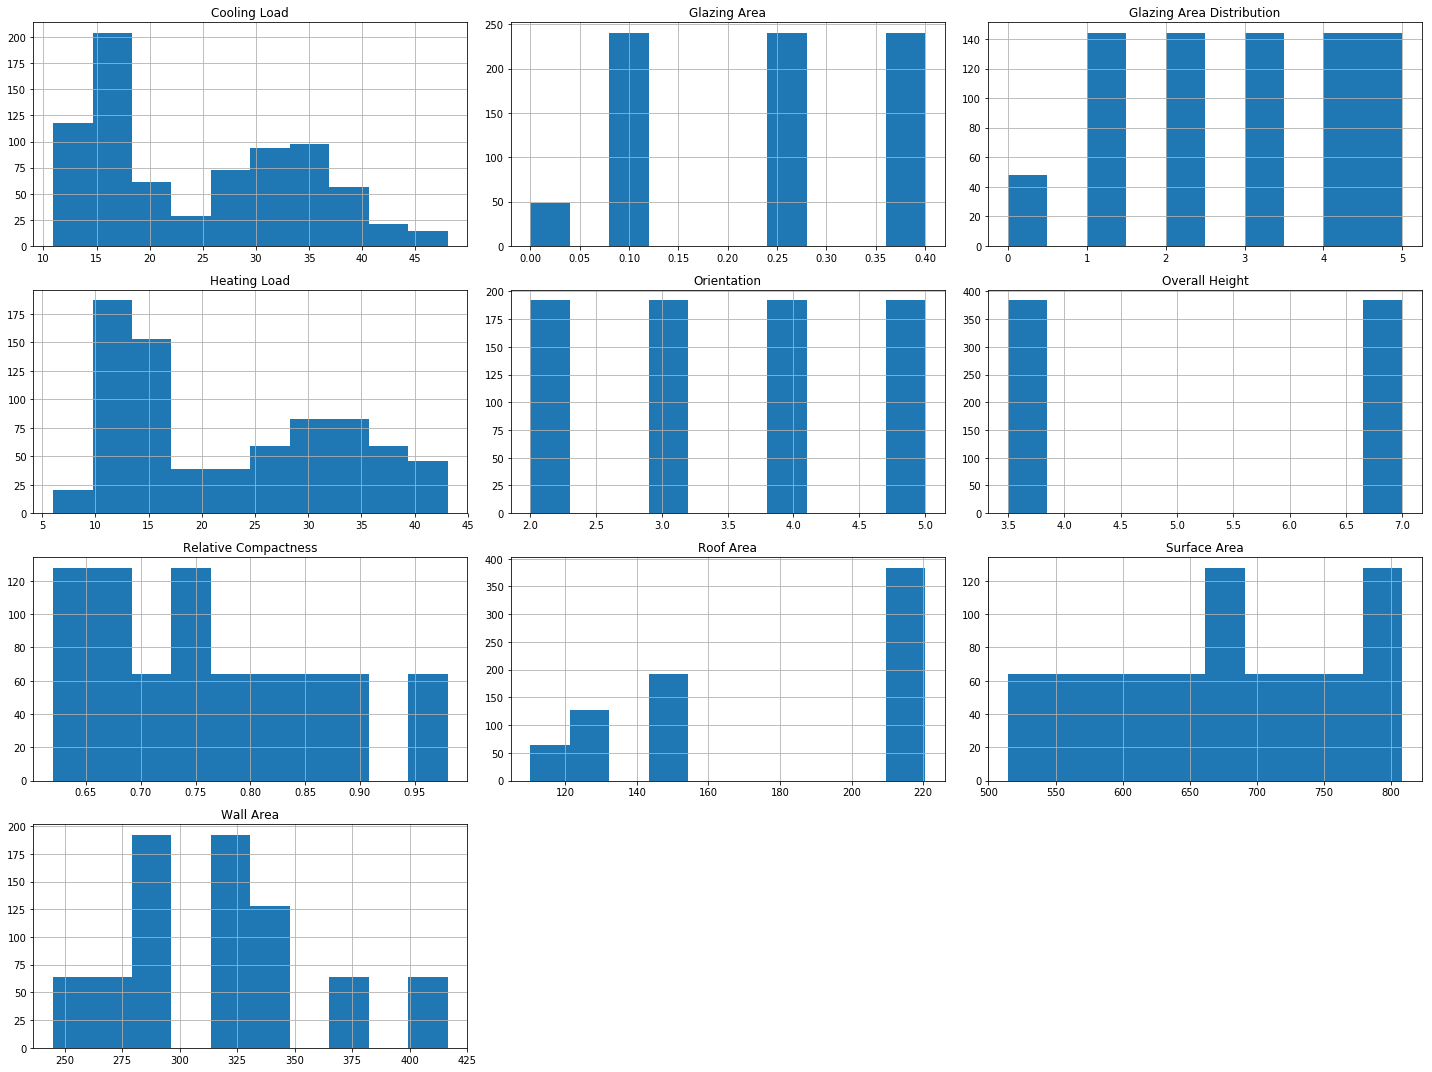

In [6]:
# histograms of the variales
df.hist(bins=10, figsize=(20,15))
plt.tight_layout()    
plt.show()

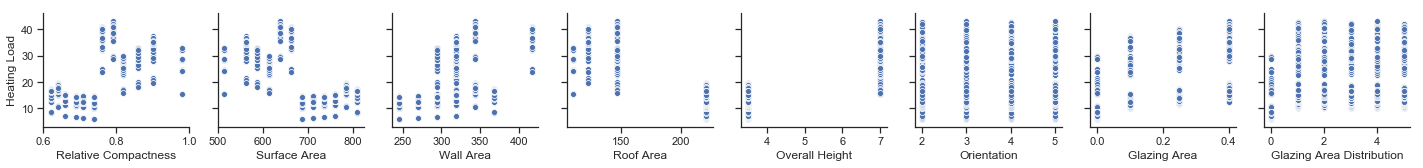

In [7]:
# scatter plot of heating load
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    df,
    kind='scatter',
    y_vars=['Heating Load'],
    x_vars=df.columns[:8]
)

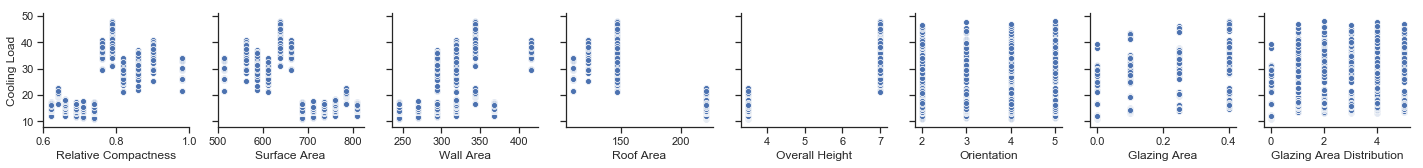

In [8]:
# scatter plot of cooling load
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    df,
    kind='scatter',
    y_vars=['Cooling Load'],
    x_vars=df.columns[:8]
)

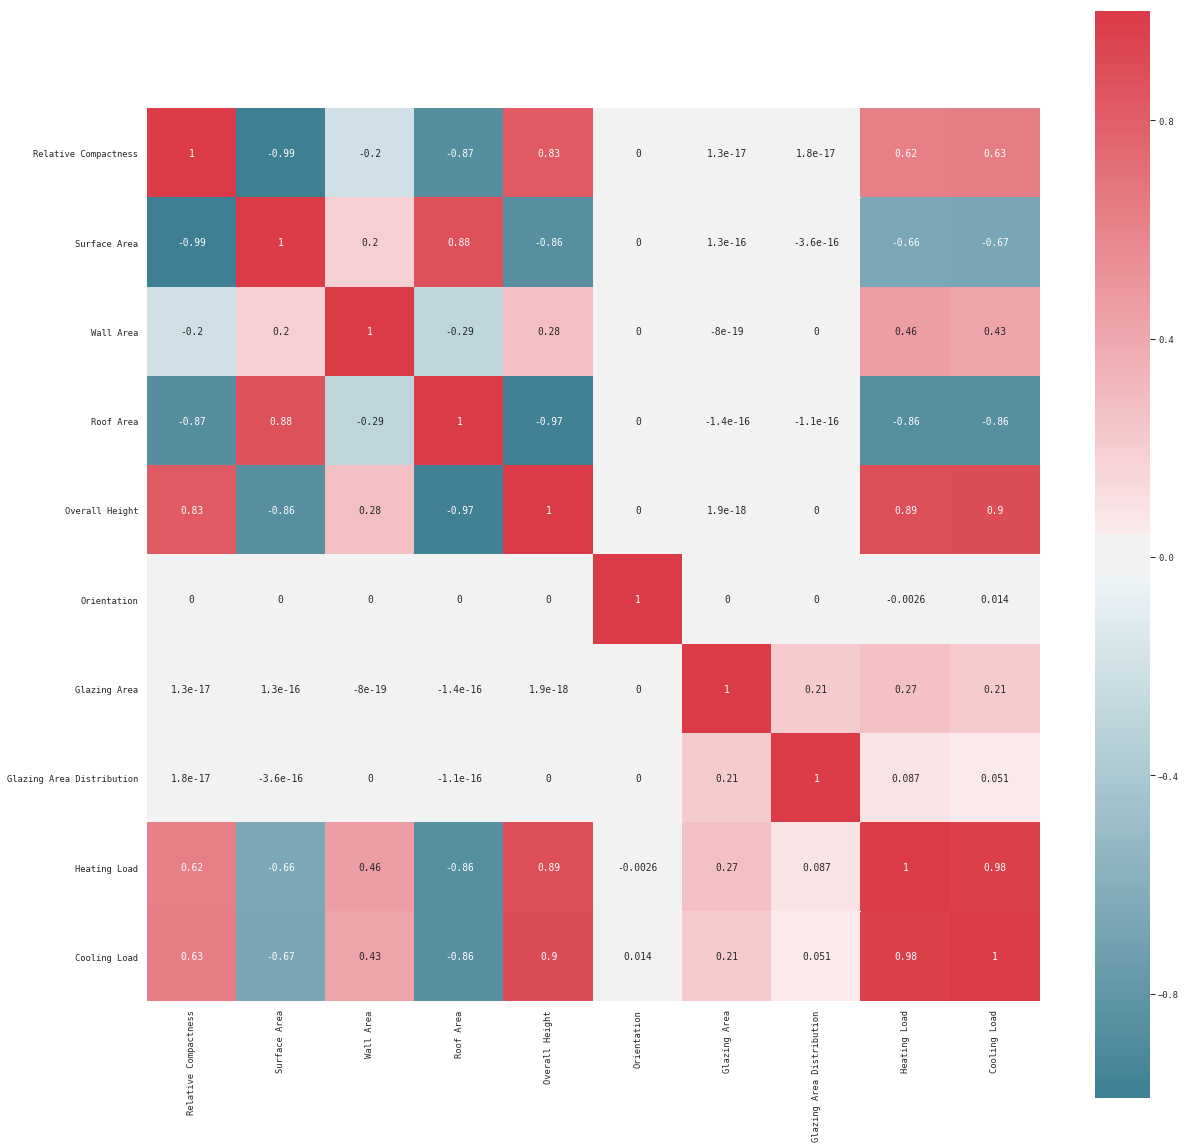

In [9]:
# correlation of the variables
sns.set(context="paper",font="monospace")
housing_corr_matrix = df.corr()
fig, axe = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True) #color palettes
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True ) #draw heatmap

In [10]:
df = df.dropna()
len(df)

768

### Review

After reading the csv file, the summary statistics of the dataset were taken. Following are the observations:
- there aren't any missing values, but the csv file includes 2 unnecessary null columns and 500+ null rows so those were removed from the df
- the df is of 768 numeric values for 8 feature columns and 2 target columns
- descriptive summary and histograms showed the distribution of the data, and its distribution is not normal
- both target columns are skewed to the right
- ticks scatter plots of heating and cooling were also very similar
- the correlation chart showed nice correlatin factors for the variables, and that heating and cooling load were highly and identically correlated

In [11]:
# split df into train and test for the target columns
X = df.iloc[:,:8]
y1 = df.iloc[:,8]
y2 = df.iloc[:,9]

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.2, random_state = 0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2, random_state = 0)
print("X train:", X1_train.shape)
print("y train:", y1_train.shape)
print("X test:", X1_test.shape)
print("y test:", y1_test.shape)

X train: (614, 8)
y train: (614,)
X test: (154, 8)
y test: (154,)


In [49]:
# multiple linear regression, ridge and lasso regression
# cross-validation of fitted set
classifier_names = ["Linear","Ridge","Lasso"]
classifiers = [LinearRegression(),Ridge(),Lasso()]      
cross_val_scores1 = []
cross_val_scores2 = []
for classifier in classifiers:
    classifier_names1 = classifier.fit(X1_train, y1_train) #fit trains the model
    scores1 = cross_val_score(classifier, X1_train, y1_train, cv=10) #10-fold cv
    cross_val_scores1.append(np.mean(scores1))
    classifier_names2 = classifier.fit(X2_train, y2_train) #fit trains the model
    scores2 = cross_val_score(classifier, X2_train, y2_train, cv=10) #10-fold cv
    cross_val_scores2.append(np.mean(scores2))

print("Heating Load Cross-Validation:", cross_val_scores1)
print("Cooling Load Cross-Validation:", cross_val_scores2)

Heating Load Cross-Validation: [0.9129452341443333, 0.9088204437168811, 0.7876446590035595]
Cooling Load Cross-Validation: [0.8821042510882899, 0.877330784940748, 0.7701699363274137]


In [14]:
# StandardScaler
print("Before scaling: \n", X.iloc[:5,:])
X_sc = pd.DataFrame(StandardScaler().fit_transform(X))
X_sc.columns = X.columns
print("\nAfter scaling: \n", X_sc.iloc[:5,:])

Before scaling: 
    Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  
0          2.0           0.0                        0.0  
1          3.0           0.0                        0.0  
2          4.0           0.0                        0.0  
3          5.0           0.0                        0.0  
4          2.0           0.0                        0.0  

After scaling: 
    Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              2.041777     -1.785875  -0.561951  -1.470077   

In [16]:
# MinMaxScaler
X_scaled =  pd.DataFrame(MinMaxScaler().fit_transform(X))
X_scaled.columns = X.columns
print(X_scaled.iloc[:5,:])

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              1.000000      0.000000   0.285714   0.000000             1.0   
1              1.000000      0.000000   0.285714   0.000000             1.0   
2              1.000000      0.000000   0.285714   0.000000             1.0   
3              1.000000      0.000000   0.285714   0.000000             1.0   
4              0.777778      0.166667   0.428571   0.111111             1.0   

   Orientation  Glazing Area  Glazing Area Distribution  
0     0.000000           0.0                        0.0  
1     0.333333           0.0                        0.0  
2     0.666667           0.0                        0.0  
3     1.000000           0.0                        0.0  
4     0.000000           0.0                        0.0  


In [17]:
# MinMaxScaler + StandardScaler
X_scaled1 =  pd.DataFrame(MinMaxScaler().fit_transform(X_sc))
X_scaled1.columns = X.columns
print(X_scaled1.iloc[:5,:])

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              1.000000      0.000000   0.285714   0.000000             1.0   
1              1.000000      0.000000   0.285714   0.000000             1.0   
2              1.000000      0.000000   0.285714   0.000000             1.0   
3              1.000000      0.000000   0.285714   0.000000             1.0   
4              0.777778      0.166667   0.428571   0.111111             1.0   

   Orientation  Glazing Area  Glazing Area Distribution  
0     0.000000           0.0                        0.0  
1     0.333333           0.0                        0.0  
2     0.666667           0.0                        0.0  
3     1.000000           0.0                        0.0  
4     0.000000           0.0                        0.0  


In [44]:
# split scaled sets
print("Heating Load scaled:")
X1_train_sc, X1_test_sc, y1_train_sc, y1_test_sc = train_test_split(X_sc, y1, test_size=0.2, random_state=0)
print("StandardScaler ", len(X1_train_sc), "train +", len(X1_test_sc), "test")
X1_train_scaled, X1_test_scaled, y1_train_scaled, y1_test_scaled = train_test_split(X_scaled, y1, test_size=0.2, random_state=0)
print("MinMaxScaler ", len(X1_train_scaled), "train +", len(X1_test_scaled), "test")

print("\nCooling Load scaled:")
X2_train_sc, X2_test_sc, y2_train_sc, y2_test_sc = train_test_split(X_sc, y2, test_size=0.2, random_state=0)
print("StandardScaler ", len(X2_train_sc), "train +", len(X2_test_sc), "test")
X2_train_scaled, X2_test_scaled, y2_train_scaled, y2_test_scaled = train_test_split(X_scaled, y2, test_size=0.2, random_state=0)
print("MinMaxScaler ", len(X2_train_scaled), "train +", len(X2_test_scaled), "test")

Heating Load scaled:
StandardScaler  614 train + 154 test
MinMaxScaler  614 train + 154 test

Cooling Load scaled:
StandardScaler  614 train + 154 test
MinMaxScaler  614 train + 154 test


In [55]:
# scores after scaling
cross_val_scores_sc1 = []
cross_val_scores_sc2 = []
for classifier in classifiers:
    classifier_names1 = classifier.fit(X1_train_sc, y1_train_sc)
    scores1 = cross_val_score(classifier, X1_train_sc, y1_train_sc, cv=10)
    cross_val_scores_sc1.append(np.mean(scores1))
    classifier_names2 = classifier.fit(X2_train_sc, y2_train_sc)
    scores2 = cross_val_score(classifier, X2_train_sc, y2_train_sc, cv=10)
    cross_val_scores_sc2.append(np.mean(scores2))
print("Heating Cross-Validation:", cross_val_scores_sc1)
print("Cooling Cross-Validation:", cross_val_scores_sc2)

Heating Cross-Validation: [0.9127590851286665, 0.9126553357283157, 0.8815088942235653]
Cooling Cross-Validation: [0.8823763845149811, 0.8822373368811098, 0.8452774992132758]


Text(0.5, 1.0, 'Heating Scatter Plot\nPredicted vs Actual')

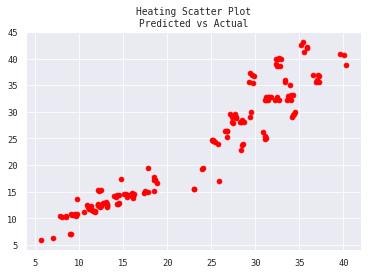

In [155]:
plt.scatter(pred_train1, y1_test, c="red")
plt.title('Heating Scatter Plot\nPredicted vs Actual')

Text(0.5, 1.0, 'Cooling Scatter Plot\nPredicted vs Actual')

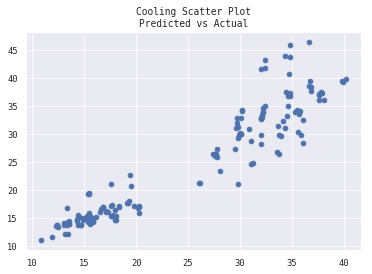

In [156]:
plt.scatter(pred_train2, y2_test)
plt.title('Cooling Scatter Plot\nPredicted vs Actual')

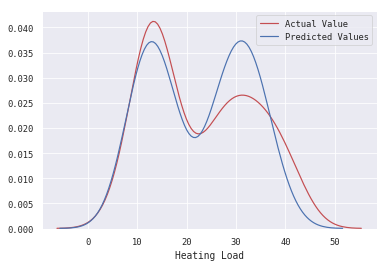

In [157]:
# before model, view fitted vs actuals of heating load
ax1 = sns.distplot(y1_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_train1, hist=False, color='b', label="Predicted Values", ax=ax1)

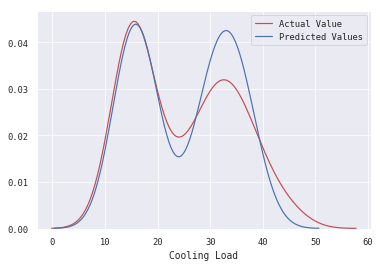

In [158]:
# before model, view fitted vs actuals of cooling load
ax1 = sns.distplot(y2_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_train2, hist=False, color='b', label="Predicted Values", ax=ax1)

### Review

The dataset was split into train and test sets, and the cross-validation scores were obtained after fitting the unscaled dataset. 

- the train set of 614 and test set of 154 were fitted with the classifiers of linear, lasso, and ridge regressions
- after cross validating with cv=10, the Heating Load resulted in around 4% higher accuracy than Cooling Load
- the data was scaled with StandardScaler first, which scales to a mean of 0; then MinMaxScaler was performed alone and also with the StandardScaled data to see difference and it showed the same outputs so it's unnecessary to scale together
- after scaling with StandardScaler, the Ridge and Lasso scores improved, but the Linear stayed same and is the highest score

In [92]:
# linear regression was best fit model to predict
lm = LinearRegression()
model_lm1 = lm.fit(X1_train_sc, y1_train_sc)
pred_train1 = model_lm1.predict(X1_test_sc) 
print("Predicted Heating mean: ", np.mean(pred_train1))
print("Test Heating mean: ", np.mean(y1_test))

model_lm2 = lm.fit(X2_train_sc, y2_train_sc)
pred_train2 = model_lm2.predict(X2_test_sc) 
print("\nPredicted Cooling mean: ", np.mean(pred_train2))
print("Test Cooling mean: ", np.mean(y2_test))

Predicted Heating mean:  22.645173446660568
Test Heating mean:  22.81629870129871

Predicted Cooling mean:  25.011941827203273
Test Cooling mean:  24.86532467532466


Heating Residuals mean:  0.1711252546381332


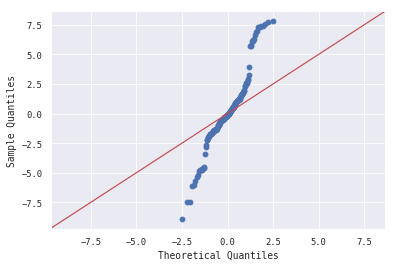

Cooling Residuals mean:  -0.14661715187859597


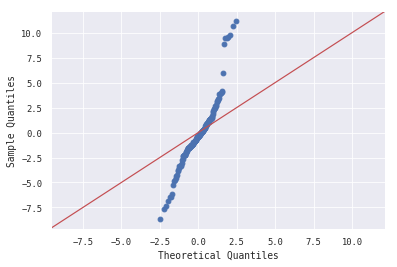

In [120]:
# q-q plot 
residuals1 = y1_test_sc - pred_train1
print("Heating Residuals mean: ", np.mean(residuals1))
sm.qqplot(residuals1, line='45')
pylab.show()

residuals2 = y2_test_sc - pred_train2
print("Cooling Residuals mean: ", np.mean(residuals2))
sm.qqplot(residuals2, line='45')
pylab.show()

Text(0, 0.5, 'Standardized Residuals')

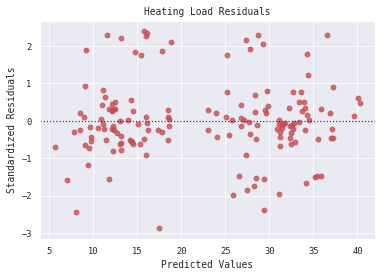

In [154]:
# zero-mean assumption, constant variance assumption
r1 = np.array(residuals1)
z_r1 = zscore(residuals1)
sort_zr1 = z_r1.sort()
sns.residplot(pred_train1, z_r1, color="r")
plt.title('Heating Load Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')

Text(0, 0.5, 'Standardized Residuals')

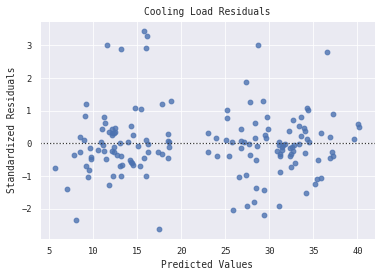

In [153]:
r2 = np.array(residuals2)
z_r2 = zscore(residuals2)
sort_zr1 = z_r2.sort()
sns.residplot(pred_train1, z_r2)
plt.title('Cooling Load Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')

In [138]:
# independence assumption
print('Heating Load\nDurbin Watson:', durbin_watson(residuals1, axis = 0))
print('\nCooling Load\nDurbin Watson:', durbin_watson(residuals2, axis = 0))

# This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.

Heating Load
Durbin Watson: 1.962394290765504

Cooling Load
Durbin Watson: 1.990170814870387


### Conclusion

The energy efficiency dataset was initilly an irregular structure since although its count was 768 of non-null value, it had 500+ NaN values that I noticed when splitting into train and test. After removing the NaN values, the clean dataset was split into train and test at 0.8 to 0.2 ratio for the target variable being heating and cooling load, separately. It was cross-validated with cv=10 and the scores were taken by fitting the multiple linear regression, lasso and ridge regression. The scores before and after scaling were same and the highest for linear regression, while they were higher after scaling for ridge and lasso. Using LinearRegression, the predicted Heating Load values had a mean of 22.64 compared to the test values' mean of 22.82; the predicted Cooling Load mean was 25.01 while the test mean was 24.86. The residuals were calculated: heating load residuals of 0.14 annd cooling load residuals of 0.17; the residuals should fall on the red line. The standardized residuals are also shown by the colored scatterplots. Next, the scatter plot shows predicted vs test values distribution. Lastly, the durbin_watson gives the autocorrelation (also called serial correlation) in residuals from regression analysis for Heating and Cooling Load, both of which were similar and close to 2.